In [1]:
'''
Cho tập tin Diemthi_thpt_quocgia_2016.xlsx chứa bộ dữ liệu điểm thi THPT Quốc Gia năm
2016 của gần 35.000 thí sinh

Yêu cầu:
Đọc dữ liệu, xem thông tin dữ liệu
Biết danh sách các môn thi là: "Toán","Ngữ văn","Địa lí","Tiếng Anh","Sinh học","Vật lí","Hóa học","Lịch sử". 
Một thí sinh chỉ thi các môn bắt buộc chung còn các môn tự chọn có thể khác nhau.
Với dữ liệu hiện tại, cột DIEM_THI là chuỗi chứa điểm thi của tất cả các môn mà một thí sinh thi
Và như vậy thì chúng ta sẽ không phân tích được điểm thi của thí sinh. 

Do đó, việc đầu tiên là phải tiền xử lý dữ liệu. Từ dữ liệu trong cột DIEM_THI, 
hãy tạo ra các cột tương ứng với danh sách các môn thi nói trên và đưa điểm của thí sinh từ chuỗi vào các cột, 
môn nào thí sinh không thi thì sẽ để NaN.

Hãy vẽ biểu đồ phân phối tần suất điểm thi, mỗi điểm thi là một biểu đồ, 
nhận xét trên từng biểu đồ: các thống kê mô tả, phân phối chuẩn hay nghiêng? Đường cong cao hơn hay thấp hơn phân phối chuẩn… 

Lưu dữ liệu điểm thi sau khi đã chuẩn hóa để sử dụng.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import random
import re

import warnings
warnings.filterwarnings('ignore')

In [3]:
#-----------------------------------------IN THIS FILE, USE Regular Expression TO EXTRACT THE WANTED STRING------------------#

In [5]:
diem_2016 = pd.read_excel("data1/Diemthi_thpt_quocgia_2016.xlsx")

In [6]:
print(diem_2016.head())

print('===================================================================')
print(diem_2016.info())

   SOBAODANH         HO_TEN   NGAY_SINH         TEN_CUMTHI GIOI_TINH  \
0  018000001  DƯƠNG VIỆT AN  12/03/1998  Sở GDĐT Bắc Giang       Nam   
1  018000002      ĐỖ VĂN AN  09/12/1998  Sở GDĐT Bắc Giang       Nam   
2  018000003     ĐỖ XUÂN AN  12/08/1997  Sở GDĐT Bắc Giang       Nam   
3  018000004   ĐẶNG PHÚC AN  19/03/1998  Sở GDĐT Bắc Giang        Nữ   
4  018000005    ĐẶNG VĂN AN  25/10/1998  Sở GDĐT Bắc Giang       Nam   

                                            DIEM_THI  
0  Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3....  
1  Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.5...  
2  Toán:   4.50   Ngữ văn:   5.50   Địa lí:   3.7...  
3  Toán:   3.00   Ngữ văn:   6.00   Địa lí:   5.5...  
4  Toán:   2.25   Ngữ văn:   4.75   Địa lí:   5.2...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_T

In [9]:
lst_mon_hoc = ['Toán', 'Ngữ văn', 'Địa lí', 'Lịch sử', 'Tiếng Anh', 'Sinh học', 'Vật lí', 'Hóa học']
lst_mon_hoc_eng = ['Math', 'Literature', 'Geography', 'History', 'English', 'Biology', 'Physics', 'Chemistry']

dict_mon_hoc = dict(zip(lst_mon_hoc,lst_mon_hoc_eng)) #Create a dictionary from key_list and value_list
dict_mon_hoc

{'Toán': 'Math',
 'Ngữ văn': 'Literature',
 'Địa lí': 'Geography',
 'Lịch sử': 'History',
 'Tiếng Anh': 'English',
 'Sinh học': 'Biology',
 'Vật lí': 'Physics',
 'Hóa học': 'Chemistry'}

In [11]:
print(diem_2016['DIEM_THI'].loc[0])

#Try to extract the "Toán:   2.00"
#The pattern is: Toán:\s{3}\d+.\d{2}
#   \s{3} means matching three white space characters
#   \d means matching a digit
#   + means matching the expression to its left 1 or more times.
#   \d+ will return 1 digit or 2 digit
#   \d{2} means matching exactly 2 digits, no less
#   so, \d+.\d{2} will be 8.12 or 10.00 or other scores

#To make python understand the RE patteren, put them in the paranthese ()
#====>   "(Toán:\s{3}\d+.\d{2})"

#re.search(extract_patteren, original_string)
Toan_string = re.search("(Toán:\s{3}\d+.\d{2})",diem_2016['DIEM_THI'].loc[0])
print('\nToan_string.group() ===>',Toan_string.group())
print('\nToan_string.[0] ===>',Toan_string.group())

#if print(Toan_string), the output will be <re.Match object; span=(0, 12), match='Toán: 2.00'>
#To get the matched string only, use Toan_string.group() or Toan_string.[0]

Toan_string = re.search("(Toán:\s{3}\d+.\d{2})",diem_2016['DIEM_THI'].loc[0]).group()
print("\nre.search('(Toán:\s{3}\d+.\d{2})',diem_2016['DIEM_THI'].loc[0]).group() ===>",Toan_string)

#Now try to split the Toan_string wi separator = ":   "
print(Toan_string.split(':   '))

Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00

Toan_string.group() ===> Toán:   2.00

Toan_string.[0] ===> Toán:   2.00

re.search('(Toán:\s{3}\d+.\d{2})',diem_2016['DIEM_THI'].loc[0]).group() ===> Toán:   2.00
['Toán', '2.00']


In [92]:
#Now try to extract many subjects
for mon_hoc in lst_mon_hoc:
    try:
        extract_str = re.search("("+mon_hoc+":\s{3}\d+.\d{2})", diem_2016['DIEM_THI'].loc[0]).group()
    except AttributeError: print(f'{mon_hoc} not found')
    else: print(extract_str)

#extract then split them
print()
for mon_hoc in lst_mon_hoc:
    try:
        extract_str = re.search("("+mon_hoc+":\s{3}\d+.\d{2})", diem_2016['DIEM_THI'].loc[0]).group()
    except AttributeError: print(f'{mon_hoc} not found')
    else: print(extract_str.split(':   '))

Toán:   2.00
Ngữ văn:   5.50
Địa lí:   5.00
Lịch sử:   3.00
Tiếng Anh not found
Sinh học not found
Vật lí not found
Hóa học not found

['Toán', '2.00']
['Ngữ văn', '5.50']
['Địa lí', '5.00']
['Lịch sử', '3.00']
Tiếng Anh not found
Sinh học not found
Vật lí not found
Hóa học not found


In [33]:
#Now apply to the whole data frame
for mon_hoc in lst_mon_hoc:
    mon_hoc_eng = dict_mon_hoc.get(mon_hoc)
    diem_2016[mon_hoc_eng] = diem_2016['DIEM_THI'].str.extract("("+mon_hoc+":\s{3}\d+.\d{2})")[0].str.split(':   ', expand=True)[1]
    diem_2016[mon_hoc_eng].apply(float)

#diem_2016['DIEM_THI'] is a column of pandas dataframe, so it's a pandas object and we can use its .extract() attribute to get the wanted string
# .extract(..., expand=True) to add a new column right next to the current one, and it contain the extracted value
#split(':   ')[1] to get the score of the subject of each student, and pass it to the each row(student) of the column
#It will return NaN value if that student doesn't have that subject's core

In [35]:
diem_2016_new = diem_2016.drop('DIEM_THI', axis=1)
diem_2016_new.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,Math,Literature,Geography,History,English,Biology,Physics,Chemistry
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,2.00,5.50,5.00,3.00,NaN,NaN,NaN,NaN
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,5.50,5.25,5.50,NaN,3.68,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,4.50,5.50,3.75,NaN,2.25,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,3.00,6.00,5.50,NaN,1.50,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,2.25,4.75,5.25,NaN,2.00,NaN,NaN,NaN


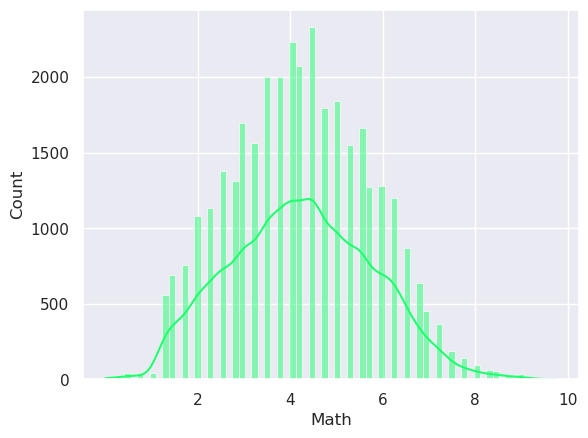


count    34500.000000
mean         4.230152
std          1.534198
min          0.000000
25%          3.000000
50%          4.250000
75%          5.250000
max          9.750000
Name: Math, dtype: float64

Skewness of Math = 0.122 > 0, Right skewed
Kurtosis of Math = -0.432 < 0, Lower than normal distribution



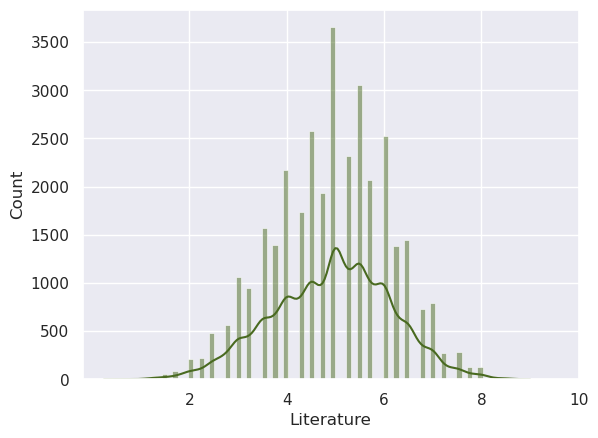


count    33894.000000
mean         4.931522
std          1.208094
min          0.250000
25%          4.000000
50%          5.000000
75%          5.750000
max          9.000000
Name: Literature, dtype: float64

Skewness of Literature = -0.157 < 0, Left skewed
Kurtosis of Literature = -0.199 < 0, Lower than normal distribution



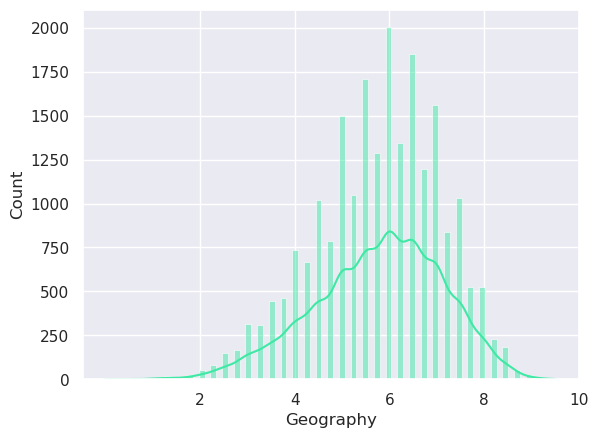


count    22171.000000
mean         5.776961
std          1.349774
min          0.000000
25%          5.000000
50%          6.000000
75%          6.750000
max          9.500000
Name: Geography, dtype: float64

Skewness of Geography = -0.383 < 0, Left skewed
Kurtosis of Geography = -0.12 < 0, Lower than normal distribution



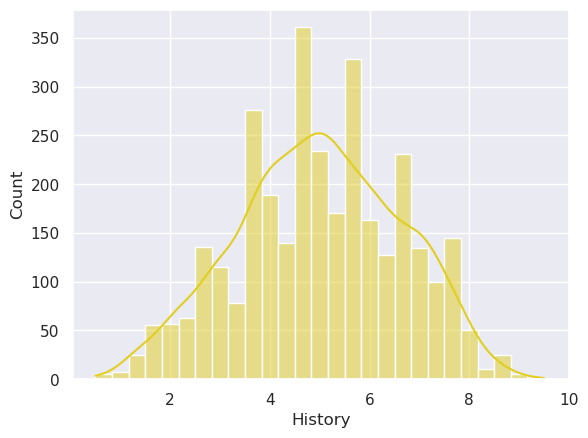


count    3235.000000
mean        4.979753
std         1.632359
min         0.500000
25%         3.750000
50%         5.000000
75%         6.250000
max         9.500000
Name: History, dtype: float64

Skewness of History = -0.091 < 0, Left skewed
Kurtosis of History = -0.522 < 0, Lower than normal distribution



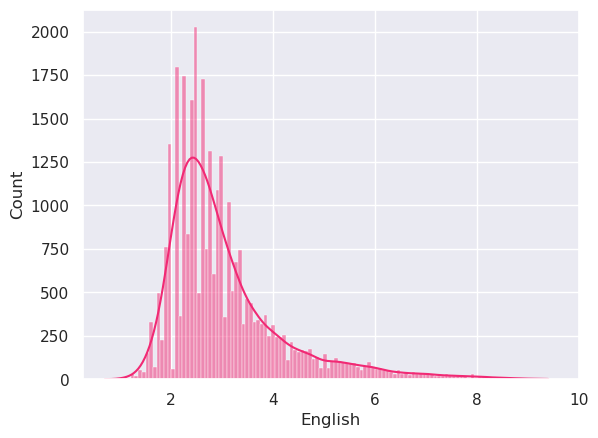


count    30200.000000
mean         3.054140
std          1.163439
min          0.700000
25%          2.300000
50%          2.750000
75%          3.430000
max          9.400000
Name: English, dtype: float64

Skewness of English = 1.806 > 0, Right skewed
Kurtosis of English = 3.98 > 0, Higher than normal distribution



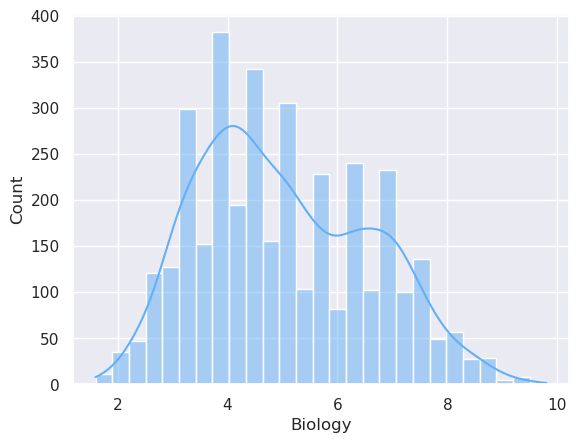


count    3571.000000
mean        5.020274
std         1.555571
min         1.600000
25%         3.800000
50%         4.800000
75%         6.200000
max         9.800000
Name: Biology, dtype: float64

Skewness of Biology = 0.349 > 0, Right skewed
Kurtosis of Biology = -0.681 < 0, Lower than normal distribution



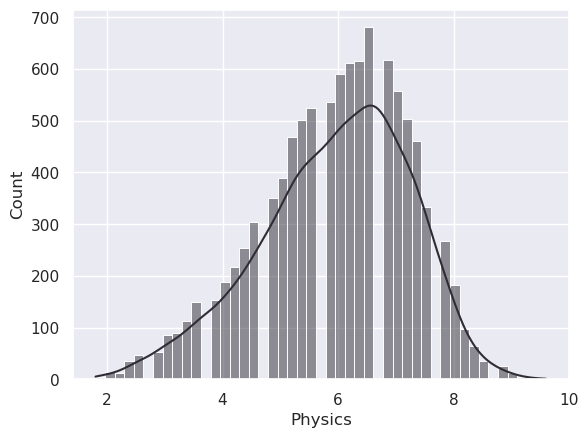


count    10157.000000
mean         5.958103
std          1.290421
min          1.800000
25%          5.200000
50%          6.000000
75%          7.000000
max          9.600000
Name: Physics, dtype: float64

Skewness of Physics = -0.446 < 0, Left skewed
Kurtosis of Physics = -0.144 < 0, Lower than normal distribution



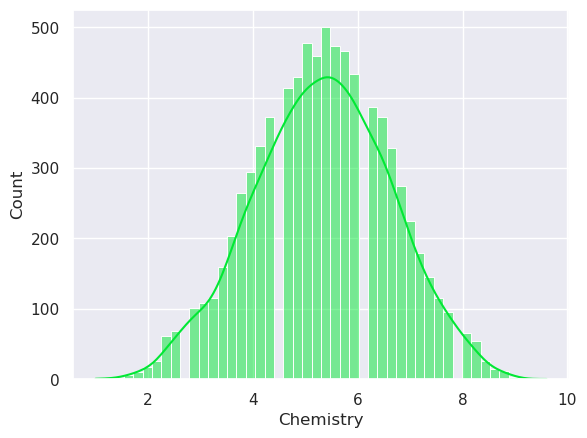


count    8097.000000
mean        5.330122
std         1.303663
min         1.000000
25%         4.400000
50%         5.400000
75%         6.200000
max         9.600000
Name: Chemistry, dtype: float64

Skewness of Chemistry = -0.06 < 0, Left skewed
Kurtosis of Chemistry = -0.278 < 0, Lower than normal distribution



In [43]:
#Draw the histogram plot for each subject accompanied with some descriptive statistics information:
for i in range(len(lst_mon_hoc_eng)):
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF)) #Create a random color

    data = diem_2016_new[lst_mon_hoc_eng[i]].dropna().apply(float)
    #Since there are NaN values in the column, its type will be "object"
    #So use dropna() and apply(float) to convert them into "float" type
    
    sbn.set_theme(style='darkgrid')
    sbn.histplot(data, kde=True, color = random_color)
    plt.xticks([2,4,6,8,10])
    plt.show()
    
    print()
    print(data.describe())
    
    print()
    skew = stats.skew(data.dropna())
    if skew >= 0: print(f'Skewness of {lst_mon_hoc_eng[i]} = {round(skew,3)} > 0, Right skewed')
    else: print(f'Skewness of {lst_mon_hoc_eng[i]} = {round(skew,3)} < 0, Left skewed')

    kurt = stats.kurtosis(data, fisher=True)
    if kurt >= 0: print(f'Kurtosis of {lst_mon_hoc_eng[i]} = {round(kurt,3)} > 0, Higher than normal distribution')
    else: print(f'Kurtosis of {lst_mon_hoc_eng[i]} = {round(kurt,3)} < 0, Lower than normal distribution')
    print()
    print('='*70)